<a href="https://colab.research.google.com/github/y2om/API/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4%EC%99%80_API_6%EC%A3%BC%EC%B0%A8(RNN%2CLSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

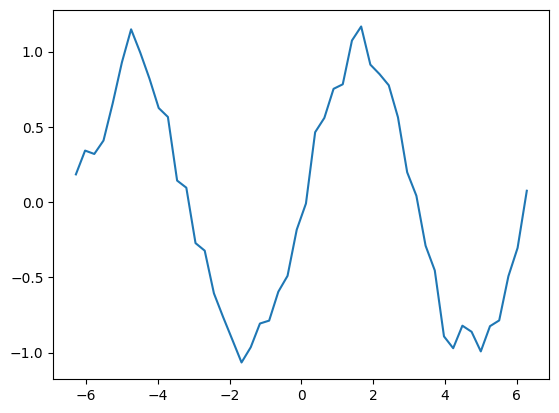

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi) #-2π에서 2π까지                     
sin_data = np.sin(x_data) + 0.1*np.random. randn(len(x_data))
# sin() 함수에 난수로 노이즈를 더한다

plt.plot(x_data , sin_data) 
plt.show()

n_rnn= 10 # 시계열의 수
n_sample =len(x_data) - n_rnn # 샘플 수
x= np.zeros((n_sample, n_rnn)) # 98
t = np.zeros((n_sample, n_rnn)) # 38
for i in range(0, n_sample):
  x[i] = sin_data[i:i+n_rnn]

In [ ]:
t[i] = sin_data[i+1:i+n_rnn+1]  # 시계열을 입력보다도 1개 뒤로 비켜놓는다
x = x.reshape(n_sample, n_rnn, 1) # Keras에서의 RNN에서는 입력을 (샘플 수, 시계열의 수, 입력층의 뉴런 수)로 한다
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1) # 이번은 입력과 같은 형태
print(t.shape)

(40, 10, 1)
(40, 10, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

n_in= 1#입력층의의 뉴런런 수수 
n_mid =20 # 중간층의의 뉴런런 수수
n_out= 1 #출력층의의 뉴런런 수

model =Sequential()
model.add(SimpleRNN(n_mid, input_shape=(n_rnn,n_in),
return_sequences=True))#간단한한 RNN층층
model.add(Dense(n_out, activation="linear")) #전결합층층
model.compile(loss="mean_squared_error", optimizer ="sgd")
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 20)            440       
                                                                 
 dense (Dense)               (None, 10, 1)             21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(x, t, epochs=20, batch_size=8, validation_split=0.1)

Epoch 1/20
5/5 [==============================] - 5s 112ms/step - loss: 0.0153 - val_loss: 0.1804
Epoch 2/20
5/5 [==============================] - 0s 34ms/step - loss: 0.0138 - val_loss: 0.1771
Epoch 3/20
5/5 [==============================] - 0s 35ms/step - loss: 0.0128 - val_loss: 0.1748
Epoch 4/20
5/5 [==============================] - 0s 32ms/step - loss: 0.0121 - val_loss: 0.1736
Epoch 5/20
5/5 [==============================] - 0s 32ms/step - loss: 0.0114 - val_loss: 0.1719
Epoch 6/20
5/5 [==============================] - 0s 30ms/step - loss: 0.0108 - val_loss: 0.1718
Epoch 7/20
5/5 [==============================] - 0s 31ms/step - loss: 0.0102 - val_loss: 0.1709
Epoch 8/20
5/5 [==============================] - 0s 33ms/step - loss: 0.0097 - val_loss: 0.1686
Epoch 9/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0092 - val_loss: 0.1676
Epoch 10/20
5/5 [==============================] - 0s 24ms/step - loss: 0.0088 - val_loss: 0.1668
Epoch 11/20
5/5 [===========

<function matplotlib.pyplot.show(close=None, block=None)>

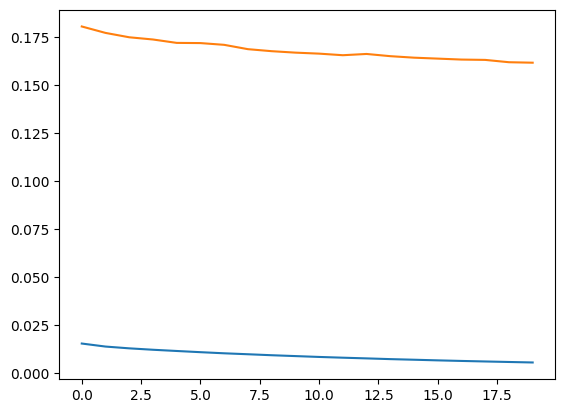

In [ ]:
loss=history.history['loss']
vloss=history.history['val_loss']

plt.plot(np.arange(len(loss)),loss)
plt.plot(np.arange(len(vloss)),vloss)
plt.show

1/1 [==============================] - 0s 20ms/step


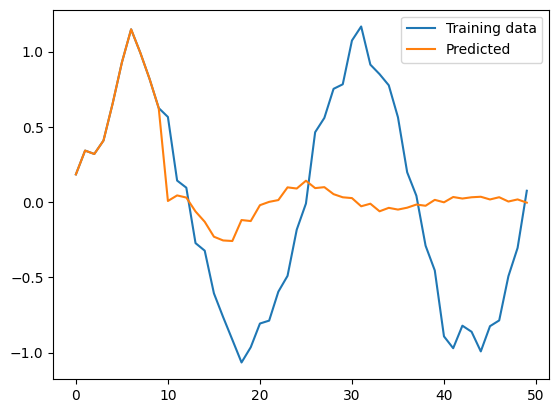

In [ ]:
predicted=x[0].reshape(-1) #처음의 입력.reshape(-1)으로
#1차원의 벡터로 한다.

for i in range(0,n_sample):
  y=model.predict(predicted[-n_rnn:].reshape(1,n_rnn,1))
  #최근 데이터를 사용해서 예측을 실시한다
  predicted= np.append(predicted,y[0][n_rnn-1][0])
#출력의 최후 결과를 predicteed에 추가한다
plt.plot(np.arange(len(sin_data)),sin_data,label="Training data") #훈련에 사용한 데이터
plt.plot(np.arange(len(predicted)),predicted,label="Predicted")
#예측 결과
plt.legend()
plt.show()

(40, 10, 1)
(40, 10, 1)


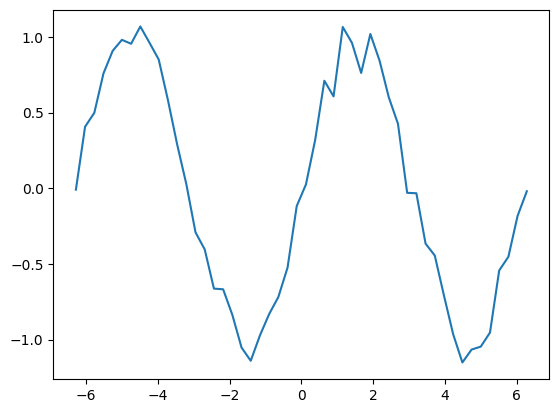

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x_data = np.linspace(-2*np.pi,2*np.pi)
sin_data=np.sin(x_data)+0.1*np.random.randn(len(x_data))
#sin()함수에 난수로 노이즈를 더한다

plt.plot(x_data,sin_data)
plt
n_rnn=10 #시계열의 수
n_sample= len(x_data)-n_rnn   # 샘플 수
x=np.zeros((n_sample,n_rnn))  # 입력
t=np.zeros((n_sample,n_rnn))  # 정답
for i in range(0,n_sample):
  x[i]=sin_data[i:i+n_rnn]
  t[i]=sin_data[i+1:i+n_rnn+1]#시계열을 입력보다도 1개 뒤로 비켜놓는다

x=x.reshape(n_sample,n_rnn,1) #샘플 수, 시계열의 수, 입력층의 뉴런 수

print(x.shape)
t=t.reshape(n_sample,n_rnn,1) #이번은 입력과 같은 형태
print(t.shape)

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, SimpleRNN,LSTM

n_in=1      #입력층의 뉴런 수
n_mid=20    #중간층의 뉴런 수
n_out=1     #출력층의 뉴런 수
#비교를 위한 통상의 RNN
model_rnn= Sequential()
model_rnn.add(SimpleRNN(n_mid,input_shape=(n_rnn,n_in),return_sequences=True))
model_rnn.add(Dense(n_out,activation="linear"))
model_rnn.compile(loss="mean_squared_error",optimizer="sgd")
print(model_rnn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10, 20)            440       
_________________________________________________________________
dense (Dense)                (None, 10, 1)             21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#LSTM
import numpy as np
import matplotlib.pyplot as plt
model_lstm=Sequential()
model_lstm.add(LSTM(n_mid, input_shape=(n_rnn,n_in),return_sequences=True))
model_lstm.add(Dense(n_out,activation="linear"))
model_lstm.compile(loss="mean_squared_error",optimizer="sgd")
print(model_lstm.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 20)            1760      
_________________________________________________________________
dense_2 (Dense)              (None, 10, 1)             21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
import time

epochs= 500
batch_size= 8 #배치크기
 
#일반적인 RNN
start_time=time.time()
history_rnn=model_rnn.fit(x,t,epochs=epochs,batch_size=batch_size,verbose=0)
print("학습시간 -- 일반적인 RNN--:",time.time()-start_time)

#LSTM
start_time=time.time()
history_lstm=model_lstm.fit(x,t,epochs=epochs,batch_size=batch_size,verbose=0)
print("학습 시간 --LSTM--",time.time()-start_time)

학습시간 -- 일반적인 RNN--: 13.723379611968994
학습 시간 --LSTM-- 35.474756717681885


<function matplotlib.pyplot.show(close=None, block=None)>

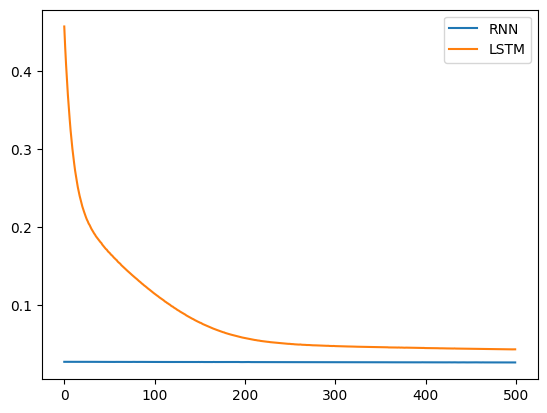

In [ ]:
loss_rnn=history_rnn.history['loss']
loss_lstm=history_lstm.history['loss']

plt.plot(np.arange(len(loss_rnn)),loss_rnn,label="RNN")
plt.plot(np.arange(len(loss_lstm)),loss_lstm,label="LSTM")
plt.legend()
plt.show

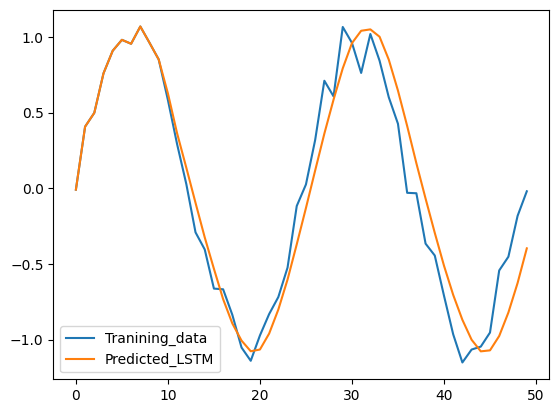

In [ ]:
predicted_rnn=x[0].reshape(-1)
predicted_lstm=x[0].reshape(-1)

for i in range(0,n_sample):
  y_rnn=model_rnn.predict(predicted_rnn[-n_rnn:].reshape(1,n_rnn,1))
  predicted_rnn=np.append(predicted_rnn,y_rnn[0][n_rnn-1][0])
  y_lstm=model_lstm.predict(predicted_lstm[-n_rnn:].reshape(1,n_rnn,1))
  predicted_lstm_lstm=np.append(predicted_lstm,y_lstm[0][n_rnn-1][0])

plt.plot(np.arange(len(sin_data)),sin_data,label="Tranining_data")
plt.plot(np.arange(len(predicted_rnn)),predicted_rnn,label="Predicted_LSTM")
plt.legend()
plt.show()